In [1]:
import numpy as np
import cv2
import ImageProcessing as ip


# Brightness (Độ sáng), contrast (Tương phản)

In [3]:
def change_brightness(value):
    global brightness
    brightness = value - 128

def change_contrast(value):
    global contrast
    contrast = float(value) / 100

In [4]:
brightness = 0
contrast = 1.0
title = "Adjust Brightness and Contrast"

# Create an instance of ImageProcessing
img_processor = ip.ImageProcessing(title, "F:/University_HCMUTE/N3_HK2/CV/flower.jpg")
# Create the window
cv2.namedWindow(title)

# Create trackbars
cv2.createTrackbar('Brightness', title, 128, 255, change_brightness)
cv2.createTrackbar('Contrast', title, 100, 300, change_contrast)
flag = 1
while True:
    # Adjust brightness and contrast
    adjusted_image = img_processor.contrast_brightness(contrast, brightness)
    img_processor.show(image=adjusted_image)
    if cv2.waitKey(10) & 0xFF == 27:
        break
    elif cv2.waitKey(10) == ord('s'):
        filepath = "F:/University_HCMUTE/N3_HK2/CV/adjusted_image/" + str(flag) + ".jpg"
        cv2.imwrite(filepath, adjusted_image)
        print("File saved to " + filepath)
        flag += 1
cv2.destroyAllWindows()


File saved to F:/University_HCMUTE/N3_HK2/CV/adjusted_image/1.jpg
File saved to F:/University_HCMUTE/N3_HK2/CV/adjusted_image/2.jpg
File saved to F:/University_HCMUTE/N3_HK2/CV/adjusted_image/3.jpg
File saved to F:/University_HCMUTE/N3_HK2/CV/adjusted_image/4.jpg
File saved to F:/University_HCMUTE/N3_HK2/CV/adjusted_image/5.jpg
File saved to F:/University_HCMUTE/N3_HK2/CV/adjusted_image/6.jpg
File saved to F:/University_HCMUTE/N3_HK2/CV/adjusted_image/7.jpg
File saved to F:/University_HCMUTE/N3_HK2/CV/adjusted_image/8.jpg
File saved to F:/University_HCMUTE/N3_HK2/CV/adjusted_image/9.jpg
File saved to F:/University_HCMUTE/N3_HK2/CV/adjusted_image/10.jpg


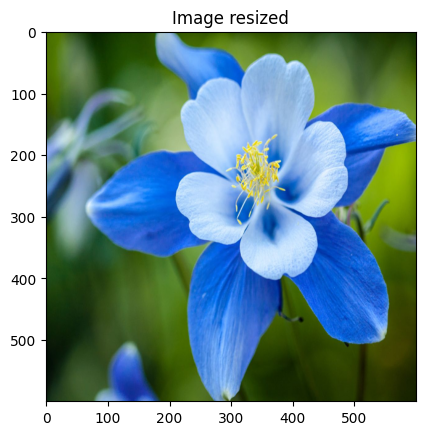

In [15]:
import matplotlib.pyplot as plt
image = cv2.imread("F:/University_HCMUTE/N3_HK2/CV/flower.jpg")
image_resize = cv2.resize(image, (600, 600))

img = cv2.cvtColor(image_resize, cv2.COLOR_BGR2RGB)

# Hiển thị hình ảnh sau khi thay đổi kích thước sử dụng matplotlib
plt.imshow(img)
plt.title("Image resized")
plt.show()

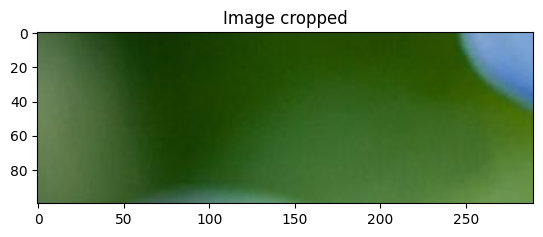

In [14]:
image_crop = img_processor.crop((400, 50), (110, 150))
image_crop_color = cv2.cvtColor(image_crop, cv2.COLOR_BGR2RGB)
plt.imshow(image_crop_color)
plt.title("Image cropped")
plt.show()

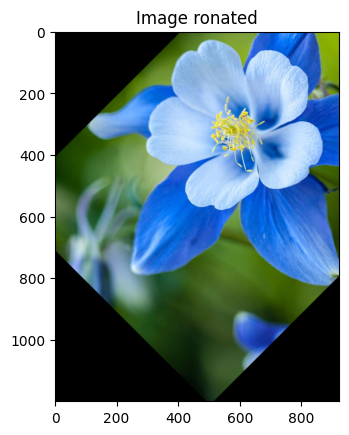

In [16]:
image_ronate = img_processor.ronate(45, image= img_processor.image)
image_ronated_color = cv2.cvtColor(image_ronate, cv2.COLOR_BGR2RGB)
plt.imshow(image_ronated_color)
plt.title("Image ronated")
plt.show()

# Hue, saturation, value 

1. Hue: màu sắc của ảnh, giá trị màu sắc khác nhau có màu sắc khác nhau 
2. saturation: bão hào, giá trị càng cao ảnh có càng nhiều màu
3. value: giá trị, value càng cao thì ảnh có độ sáng càng lớn

In [17]:
def change_hue(value):
    global hue
    hue = (value * 2) - 255

def change_saturation(value):
    global sat
    sat = (value * 2) - 255

def change_value(value):
    global val
    val = (value * 2) - 255

if __name__ == "__main__":
    hue, sat, val = 0, 0, 0
    title = "Adjust Hue, Saturation and Value"

    cv2.namedWindow(title)
    cv2.createTrackbar('Hue', title, 127, 255, change_hue)
    cv2.createTrackbar('Saturation', title, 127, 255, change_saturation)
    cv2.createTrackbar('Value', title, 127, 255, change_value)

    ip = ip.ImageProcessing(title, "F:/University_HCMUTE/N3_HK2/CV/flower.jpg")
    ip.show("Original")
    
    while True:
        adjusted_image = ip.hue_saturation_value(hue, sat, val)
        ip.show(image=adjusted_image)
        key = cv2.waitKey(10)
        if key == 27:  # ESC key
            break
        elif cv2.waitKey(10) == ord('s'):
            filepath = f"F:/University_HCMUTE/N3_HK2/CV/adjusted_image/hue={str(hue)}_sat={str(sat)}_val={str(val)}.jpg"
            cv2.imwrite(filepath, adjusted_image)
            print("File saved to " + filepath)
    cv2.destroyAllWindows()


File saved to F:/University_HCMUTE/N3_HK2/CV/adjusted_image/hue=45_sat=-123_val=-1.jpg
File saved to F:/University_HCMUTE/N3_HK2/CV/adjusted_image/hue=45_sat=-123_val=-161.jpg
File saved to F:/University_HCMUTE/N3_HK2/CV/adjusted_image/hue=45_sat=-51_val=-161.jpg
File saved to F:/University_HCMUTE/N3_HK2/CV/adjusted_image/hue=-73_sat=-51_val=71.jpg
File saved to F:/University_HCMUTE/N3_HK2/CV/adjusted_image/hue=-255_sat=-51_val=-127.jpg
File saved to F:/University_HCMUTE/N3_HK2/CV/adjusted_image/hue=-255_sat=-51_val=29.jpg
File saved to F:/University_HCMUTE/N3_HK2/CV/adjusted_image/hue=-153_sat=-51_val=29.jpg
File saved to F:/University_HCMUTE/N3_HK2/CV/adjusted_image/hue=-153_sat=113_val=29.jpg
File saved to F:/University_HCMUTE/N3_HK2/CV/adjusted_image/hue=-153_sat=113_val=-151.jpg
File saved to F:/University_HCMUTE/N3_HK2/CV/adjusted_image/hue=165_sat=113_val=-151.jpg
File saved to F:/University_HCMUTE/N3_HK2/CV/adjusted_image/hue=165_sat=-93_val=-151.jpg


# Blend image (trộn ảnh)

In [18]:
def change_alpha(value):
    global alpha 
    alpha = float(value)/100

def blend2Images(image1, image2):
    global alpha
    alpha = 0.5
    title = 'Blend Two Image'
    iproc = ip.ImageProcessing(title,"F:/University_HCMUTE/N3_HK2/CV/flower.jpg")
    toBlend = cv2.imread(image2)
    toBlend1 = cv2.imread(image2)    
    cv2.namedWindow(title)
    cv2.createTrackbar('Alpha', title, 50, 100, change_alpha)
    iproc.show('Original image 1', toBlend1)
    iproc.show('Original image 2', toBlend)

    print('Press s key to save image, ESC to exit')

    while True:
        blended_image = iproc.blend(toBlend, alpha)
        iproc.show(image=blended_image)
        ch = cv2.waitKey(10)
        if (ch & 0xFF) == 27:
            break
        elif ch == ord('s'):
        # press 's' key to save image
            filepath = f"F:/University_HCMUTE/N3_HK2/CV/Blend_Image/alpha={str(alpha)}.jpg"
            cv2.imwrite(filepath, blended_image)
            print("File saved to " + filepath)
    cv2.destroyAllWindows()


In [20]:
import ImageProcessing as ip
image1 = "F:/University_HCMUTE/N3_HK2/CV/flower.jpg"
image2 =  "F:/University_HCMUTE/N3_HK2/CV/Bird.jpg"
blend2Images(image1, image2)

Press s key to save image, ESC to exit
File saved to F:/University_HCMUTE/N3_HK2/CV/Blend_Image/alpha=0.0.jpg
File saved to F:/University_HCMUTE/N3_HK2/CV/Blend_Image/alpha=0.98.jpg
File saved to F:/University_HCMUTE/N3_HK2/CV/Blend_Image/alpha=0.51.jpg
File saved to F:/University_HCMUTE/N3_HK2/CV/Blend_Image/alpha=0.76.jpg
File saved to F:/University_HCMUTE/N3_HK2/CV/Blend_Image/alpha=0.22.jpg
File saved to F:/University_HCMUTE/N3_HK2/CV/Blend_Image/alpha=0.33.jpg
File saved to F:/University_HCMUTE/N3_HK2/CV/Blend_Image/alpha=0.45.jpg
File saved to F:/University_HCMUTE/N3_HK2/CV/Blend_Image/alpha=0.77.jpg


# Blend Image use Mask

In [21]:
def blendTwoImagesWithMask(imageFile1, imageFile2):
    title = "Blend Two Images"
    iproc = ip.ImageProcessing(title, imageFile1)
    toBlend = cv2.imread(imageFile2)

    iproc.show(title="Original Image1",image=iproc.image)
    iproc.show(title="Original Image2", image=toBlend)
    
    bg_remove, mask = iproc.rmbg_by_color(hsv_lower = (90, 0, 100),  hsv_upper = (179,255,255), image = toBlend ) # xóa background bằng một ngưỡng hsv

    iproc.show(title="Mask from Original Image2", image=mask )
    iproc.show(title="(1-Mask)", image= (255-mask))
    blend = iproc.blend_with_mask(toBlend, mask, image=iproc.image)
    return blend

In [22]:
imagepath1 = "F:/University_HCMUTE/N3_HK2/CV/flower.jpg"
imagepath2 =  "F:/University_HCMUTE/N3_HK2/CV/Bird.jpg"

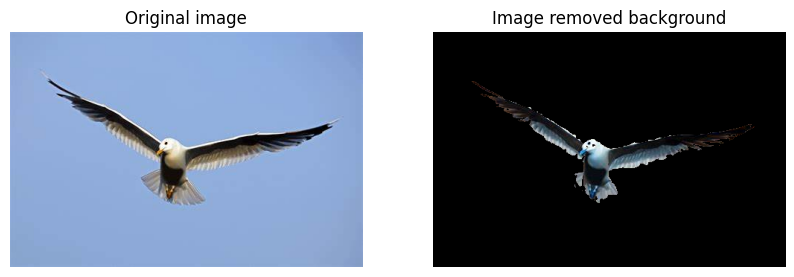

In [34]:
image1 = cv2.imread(imagepath1)
image2 = cv2.imread(imagepath2)

imgHSV = cv2.cvtColor(image2, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(imgHSV, (90, 0, 100), (179, 255, 255))
mask = 255 - mask
mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
bg_removed = cv2.bitwise_and(image2, mask)

plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.title("Original image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(bg_removed)
plt.title("Image removed background")
plt.axis("off")
plt.show()


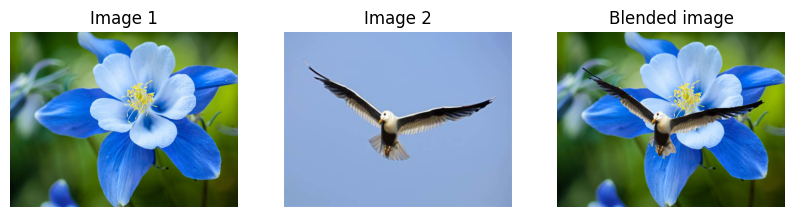

In [33]:
mask = cv2.resize(mask, image1.shape[1::-1])
image2 = cv2.resize(image2, image1.shape[1::-1])

result = cv2.bitwise_and(image2, mask) +  cv2.bitwise_and(image1,(255-mask)) #Sử dụng mask để trộn hai ảnh

plt.figure(figsize=(10, 15))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.title('Image 1')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.title('Image 2')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title('Blended image')
plt.axis("off")

plt.show()

# Warp image 

Dùng harris corner opencv để phát hiện góc  ngang và góc đứng rồi crop ảnh thôi

1. Hoặc dùng transformation matrix bằng cv2..getPerspectiveTransform() rồi dùng cv2.warpPerspective() là được
2. Nhưng cái này có vấn  đề là không biết làm sao lấy được đặc trưng góc (4 điểm góc, 4 điểm mới)

# Blur Image


1. Gaussian blur: ví dụ với 1 pixel ban đầu có vị trí (x,y) , ta tính trọng số với mỗi pixel lân cận bằng công thức gaussian G(x,y) với tham số truyền vào là khoảng cách từ pixel đó pixel ban đầu (Số lượng các pixel lân cận này được chọn dựa vào kích thước kernel đưa vào). Sau khi có các trọng số ứng với từng pixel, ta nhân trọng số đó với giá trị pixel của nó rồi thực hiện tính trung bình cộng các tích vừa tính -> Kết quả là giá trị mới của pixel(x,y) ban đầu 

In [35]:
def change_kSize(value):
    global ksize
    if value % 2 == 0:
        ksize = (value + 1, value + 1)
    else:
        ksize = (value, value)
    return ksize

import cv2

title = 'title'
global ksize
ksize = (5, 5)
img = cv2.imread("F:/University_HCMUTE/N3_HK2/CV/flower.jpg")

cv2.namedWindow(title)
cv2.createTrackbar('Ksize', title, 5, 21, change_kSize) 

while True:
    blur = cv2.GaussianBlur(img, ksize, cv2.BORDER_DEFAULT) 
    cv2.imshow(title, blur)

    ch = cv2.waitKey(1) & 0xFF
    if ch == 27:
        break
    elif ch == ord("s"):
        filepath = f"F:/University_HCMUTE/N3_HK2/CV/Blur_Image/GaussianBlur_ksize={str(ksize)}.jpg"
        cv2.imwrite(filepath, blur)
        print("File saved to " + filepath)

cv2.destroyAllWindows()


File saved to F:/University_HCMUTE/N3_HK2/CV/Blur_Image/GaussianBlur_ksize=(9, 9).jpg
File saved to F:/University_HCMUTE/N3_HK2/CV/Blur_Image/GaussianBlur_ksize=(15, 15).jpg
File saved to F:/University_HCMUTE/N3_HK2/CV/Blur_Image/GaussianBlur_ksize=(17, 17).jpg
File saved to F:/University_HCMUTE/N3_HK2/CV/Blur_Image/GaussianBlur_ksize=(19, 19).jpg
File saved to F:/University_HCMUTE/N3_HK2/CV/Blur_Image/GaussianBlur_ksize=(21, 21).jpg
File saved to F:/University_HCMUTE/N3_HK2/CV/Blur_Image/GaussianBlur_ksize=(1, 1).jpg
File saved to F:/University_HCMUTE/N3_HK2/CV/Blur_Image/GaussianBlur_ksize=(3, 3).jpg
File saved to F:/University_HCMUTE/N3_HK2/CV/Blur_Image/GaussianBlur_ksize=(3, 3).jpg


2. Median: chọn một vùng các pixel lân cận với pixel(x,y). Sắp xếp các giá trị thoe thứ tự tăng dân rồi lấy giá trị ở giữa của danh sách đó rồi gán cho giá trị pixel(x,y) ban đầu.

In [3]:
def change_kSize(value):
    global ksize_m
    if value % 2 == 0:
        ksize_m = value + 1
    else:
        ksize_m = value
    return ksize_m
title = 'title'
global ksize_m
ksize_m = 5
img = cv2.imread("F:/University_HCMUTE/N3_HK2/CV/flower.jpg")

cv2.namedWindow(title)
cv2.createTrackbar('Ksize', title, 5, 21, change_kSize) 

while True:
    blur = cv2.medianBlur(img, ksize_m, cv2.BORDER_DEFAULT) 
    cv2.imshow(title, blur)

    ch = cv2.waitKey(1) & 0xFF
    if ch == 27:
        break
    elif ch == ord("s"):
        filepath = f"F:/University_HCMUTE/N3_HK2/CV/Blur_Image/medianBlur_ksize={str(ksize_m)}.jpg"
        cv2.imwrite(filepath, blur)
        print("File saved to " + filepath)

cv2.destroyAllWindows()


File saved to F:/University_HCMUTE/N3_HK2/CV/Blur_Image/medianBlur_ksize=1.jpg
File saved to F:/University_HCMUTE/N3_HK2/CV/Blur_Image/medianBlur_ksize=3.jpg
File saved to F:/University_HCMUTE/N3_HK2/CV/Blur_Image/medianBlur_ksize=5.jpg
File saved to F:/University_HCMUTE/N3_HK2/CV/Blur_Image/medianBlur_ksize=7.jpg
File saved to F:/University_HCMUTE/N3_HK2/CV/Blur_Image/medianBlur_ksize=9.jpg
File saved to F:/University_HCMUTE/N3_HK2/CV/Blur_Image/medianBlur_ksize=11.jpg
File saved to F:/University_HCMUTE/N3_HK2/CV/Blur_Image/medianBlur_ksize=13.jpg
File saved to F:/University_HCMUTE/N3_HK2/CV/Blur_Image/medianBlur_ksize=15.jpg
File saved to F:/University_HCMUTE/N3_HK2/CV/Blur_Image/medianBlur_ksize=17.jpg
File saved to F:/University_HCMUTE/N3_HK2/CV/Blur_Image/medianBlur_ksize=21.jpg
